In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [47]:
df=pd.read_csv(r"C:\Users\AMAN\Downloads\heart.csv")

In [48]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

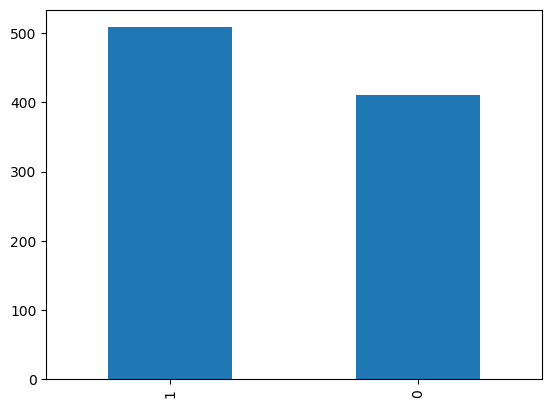

In [8]:
df['HeartDisease'].value_counts().plot(kind='bar')

In [9]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


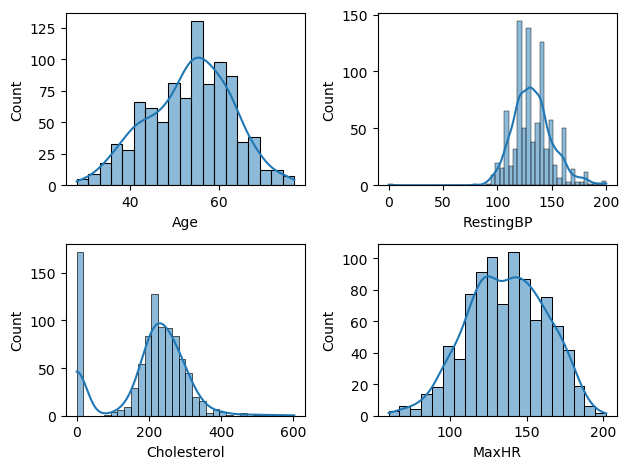

In [10]:
def plotting (var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)
plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)
plt.tight_layout()

In [11]:
df['Cholesterol'].value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
355      1
354      1
353      1
349      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

In [49]:
ch_mean=df.loc[df['Cholesterol']!=0,'Cholesterol'].mean()

In [50]:
ch_mean

244.6353887399464

In [51]:
df['Cholesterol'] = df['Cholesterol'].replace(0,ch_mean)
df['Cholesterol']=df['Cholesterol'].round(2)

In [52]:
df['Cholesterol'].value_counts()

244.64    172
254.00     11
220.00     10
223.00     10
204.00      9
         ... 
349.00      1
347.00      1
369.00      1
407.00      1
157.00      1
Name: Cholesterol, Length: 222, dtype: int64

In [53]:
resting_mean=df.loc[df['RestingBP']!=0,'RestingBP'].mean()
resting_mean

132.54089422028352

In [54]:
df['RestingBP'] = df['RestingBP'].replace(0,resting_mean)
df['RestingBP'] = df['RestingBP'].round(2)

In [55]:
df['RestingBP'].value_counts()

120.00    132
130.00    118
140.00    107
110.00     58
150.00     55
         ... 
101.00      1
127.00      1
80.00       1
92.00       1
132.54      1
Name: RestingBP, Length: 67, dtype: int64

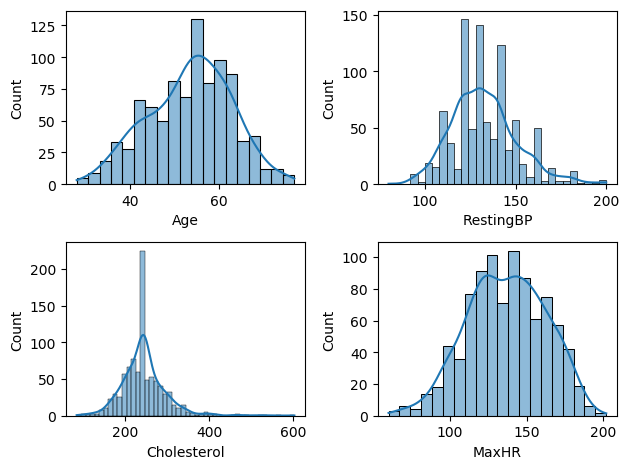

In [56]:
def plotting (var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)
plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)
plt.tight_layout()

In [57]:
cat=[]
num=[]
for column in df.columns:
    if df[column].nunique()>10:
        num.append(column)
    else:
        cat.append(column)

In [58]:
cat

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

In [59]:
num

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

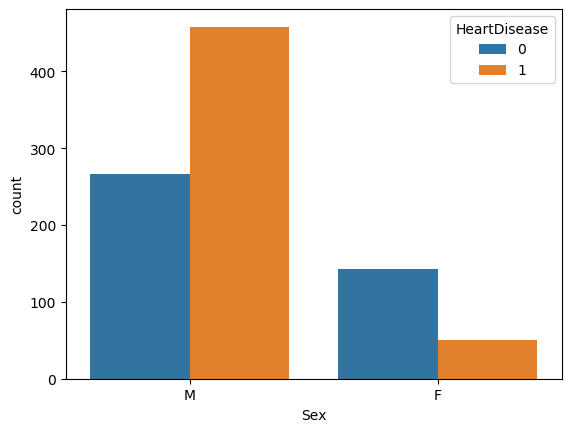

In [60]:
sns.countplot(x='Sex',data=df,hue='HeartDisease')

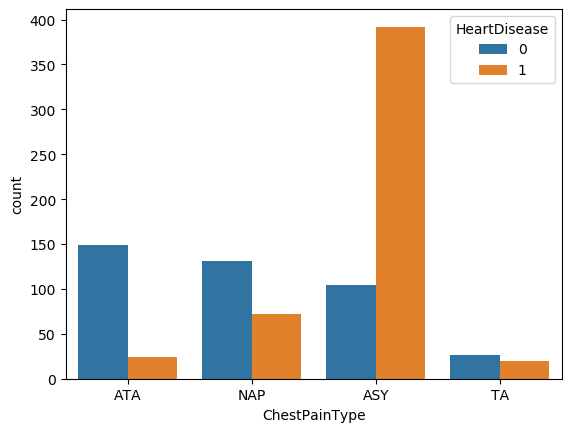

In [61]:
sns.countplot(x='ChestPainType',data=df,hue='HeartDisease')

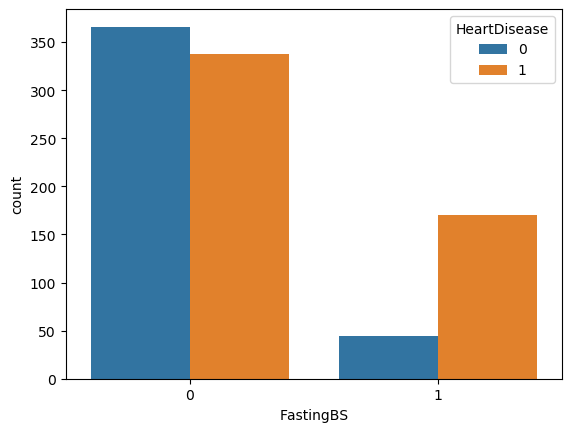

In [62]:
sns.countplot(x = df['FastingBS'],hue = df['HeartDisease'])

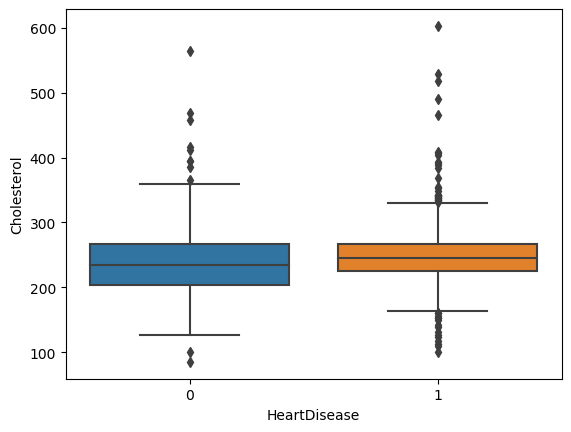

In [63]:
sns.boxplot(x = 'HeartDisease', y = 'Cholesterol',data = df)

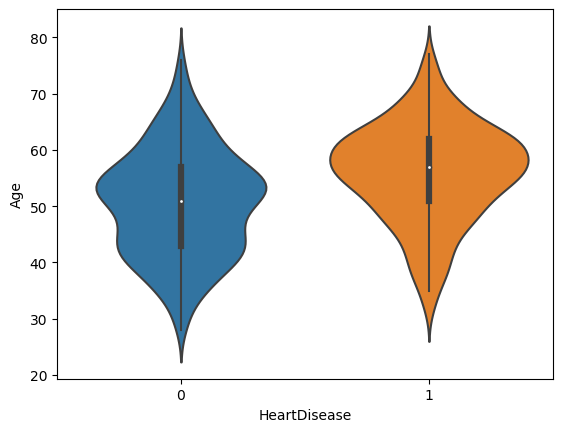

In [64]:
sns.violinplot(x='HeartDisease', y='Age', data=df)

In [65]:
df_encode = pd.get_dummies(df,drop_first=True)
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160.0,180.0,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138.0,214.0,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150.0,195.0,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144.0,193.0,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130.0,131.0,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130.0,236.0,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [66]:
df_encode = df_encode.astype(int)

In [67]:
df_encode.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [69]:
X = df_encode.drop('HeartDisease', axis=1)
y = df_encode['HeartDisease']

In [70]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [71]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
models = {
    "LogisticRegression":LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM (RBF Kernel)": SVC(probability=True)
}

In [73]:
results = []

In [74]:
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test,y_pred)
    f1 =f1_score(y_test,y_pred)
    results.append({
        "Model": name,
        "Accuracy":round(acc,3),
        "F1 score": round(f1,3)
    })

In [75]:
results

[{'Model': 'LogisticRegression', 'Accuracy': 0.87, 'F1 score': 0.885},
 {'Model': 'KNN', 'Accuracy': 0.864, 'F1 score': 0.882},
 {'Model': 'Naive Bayes', 'Accuracy': 0.848, 'F1 score': 0.861},
 {'Model': 'Decision Tree', 'Accuracy': 0.788, 'F1 score': 0.804},
 {'Model': 'SVM (RBF Kernel)', 'Accuracy': 0.848, 'F1 score': 0.867}]

In [76]:
import joblib

In [77]:
joblib.dump(models['LogisticRegression'],'proj_heart.pkl')
joblib.dump(scaler,'scaler_.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')

['columns.pkl']

In [41]:
import os
os.getcwd()


'C:\\Users\\AMAN'

In [42]:
df_encode.shape

(918, 16)

In [78]:
X.shape


(918, 15)

In [79]:
X_test_scaled.shape

(184, 15)